In [4]:
%matplotlib inline
from sklearn.datasets import fetch_openml

In [7]:
import numpy as np
import struct

def load_mnist_images(file_path):
    with open(file_path, 'rb') as file:
        _, num_images, rows, cols = struct.unpack('>IIII', file.read(16))
        images = np.fromfile(file, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def load_mnist_labels(file_path):
    with open(file_path, 'rb') as file:
        _, num_labels = struct.unpack('>II', file.read(8))
        labels = np.fromfile(file, dtype=np.uint8)
    return labels

train_images = load_mnist_images('train-images.idx3-ubyte')
train_labels = load_mnist_labels('train-labels.idx1-ubyte')
test_images = load_mnist_images('t10k-images.idx3-ubyte')
test_labels = load_mnist_labels('t10k-labels.idx1-ubyte')

# Verify the shape of the loaded data
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [9]:
import matplotlib.pyplot as plt

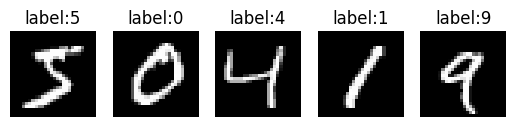

In [13]:
fig, axes = plt.subplots(1,5)
for i in range(5):
    ax=axes[i]
    ax.imshow(train_images[i],cmap='gray')
    ax.set_title(f"label:{train_labels[i]}")
    ax.axis('off')
plt.show()

In [26]:
X_train = train_images.reshape((len(train_images),-1))/255.0

In [27]:
X_test = test_images.reshape((len(test_images),-1))/255.0

In [16]:
y_train = train_labels
y_test = test_labels

In [17]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

In [28]:
X_train.shape

(60000, 784)

In [31]:
y_train.shape

(60000,)

In [32]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [33]:
y_pred=model.predict(X_test)

In [34]:
y_pred.shape

(10000,)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
score = accuracy_score(y_test,y_pred)

In [37]:
score

0.9261

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [39]:
print(confusion_matrix(y_pred,y_test))

[[ 957    0    6    4    1    9    8    1   10    9]
 [   0 1110    9    1    3    2    3    7   11    8]
 [   1    5  930   17    7    3    7   24    6    1]
 [   4    2   16  922    3   35    2    6   20    9]
 [   1    0   10    1  921    8    7    6    8   21]
 [   9    2    3   24    0  779   16    1   28    6]
 [   4    3   12    2    7   15  912    0   14    0]
 [   3    2    9   10    4    6    2  949   10   21]
 [   1   11   33   20    6   31    1    1  855    8]
 [   0    0    4    9   30    4    0   33   12  926]]


In [40]:
mi = np.where(y_test!=y_pred)[0]

In [41]:
mi.shape

(739,)

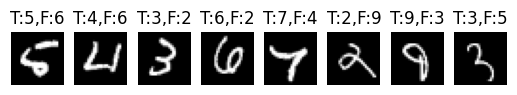

In [42]:
fig, axes = plt.subplots(1,8)
for i in range(8):
    ax=axes[i]
    ax.imshow(X_test[mi[i]].reshape(28,28),cmap='gray')
    ax.set_title(f"T:{y_test[mi[i]]},F:{y_pred[mi[i]]}")
    ax.axis('off')

plt.show()